# Predicting Precipitation from towns in Western Massachusetts using Multivariate Regression
Jonathan Clifford, Griffin Manns, Isaiah Provencher

In [8]:
# A few notes before we begin to code:
# 1) All weather data is sourced from NOAA sites in Massachusetts. 
# 2) Due to the way that the data is formatted, we had to truncate to a list of five towns. These cover a fairly broad area
# in western massachusetts, and feel as though it is good to have a starting model based off this. 
# 3) Weather was collected from January 1st 2015 - December 31st 2020

# import dependies 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# The labels of the data are as follows: 
# STATION|NAME (of town)|LATITUDE|LONGITUDE|ELEVATION|DATE|AWND|PRCP(precipitation, what we are predicting)|SNOW|TAVG|TMAX|TMIN|TOBS|WESF|WT01|...|WT11

# ultimately our algorithm will be predicting the Precipitation of this. 
data = pd.read_csv('NewDataMLEdited.csv', sep=',',header=None).values

stations = data[:,0]
townName = data[:,1]
latitude = data[:,2]
longitude = data[:,3]
elevation = data[:,4]
date = data[:,5]
awnd = data[:,6]
precipitation = data[:,7]
snow = data[:,8]
snwd = data[:,9]
tempAvg = data[:,10]
tempMax = data[:,11]
tempMin = data[:,12]
tempObs = data[:,13]
wesf = data[:,14]
wt01 = data[:,15]
wt02 = data[:,16]
wt03 = data[:,17]
wt04 = data[:,18]
wt05 = data[:,19]
wt06 = data[:,20]
wt08 = data[:,21]
wt09 = data[:,22]
wt11 = data[:,23]
# for some reason, the special weather conditions aren't linear WT01...WT11, but whatever.
print("Data has been loaded.")

Data has been loaded.


# Visualization of the dataset

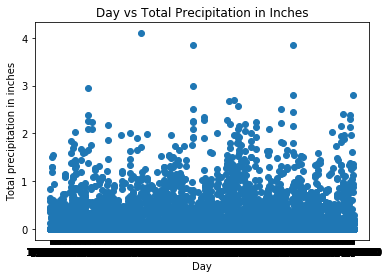

In [9]:
# Now, in order to visualize the data, we will create a simple scatterplot 
# showcasing the x axis as the date, and the y axis as the precipitation. 

plt.scatter(date, precipitation)
plt.xlabel("Day")
plt.ylabel("Total precipitation in inches")
plt.title("Day vs Total Precipitation in Inches")
plt.show()

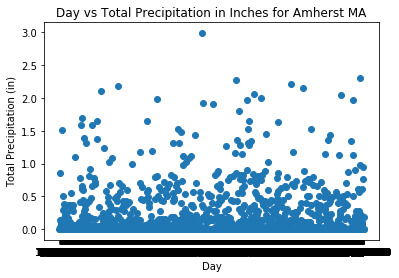

In [26]:
# similarly, I will do the same thing as above, but instead only for one town (Amherst)
curDate = []
curPrecip = []
for i in range(len(date)):
    if townName[i] == "AMHERST, MA US":
        curDate.append(date[i])
        curPrecip.append(precipitation[i])
        
# print(curDate)
# print(curPrecip)
plt.scatter(curDate, curPrecip)
plt.xlabel("Day")
plt.ylabel("Total Precipitation (in)")
plt.title("Day vs Total Precipitation in Inches for Amherst MA")
plt.show()

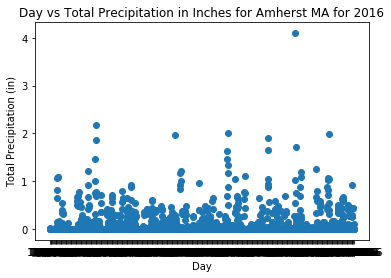

In [27]:
# similarly, we can do the same thing as above for Amherst, but only for the year of 2016. 
curDate = []
curPrecip = []
for i in range(len(date)):
    if "2016" in date[i]:
        curDate.append(date[i])
        curPrecip.append(precipitation[i])
        
# print(curDate)
plt.scatter(curDate, curPrecip)
plt.xlabel("Day")
plt.ylabel("Total Precipitation (in)")
plt.title("Day vs Total Precipitation in Inches for Amherst MA for 2016")
plt.show()

# Reloading A Modified Dataset & Grabbing What We Need

In [11]:
# Now we will begin the actual determination of the dataset. 
# We also need to essentially extract the predictor data from what we want to actually predict.
# in other words, we just need to take out the precipitation dataset from the table. 

# in addition, we will also be reloading the dataset here. 
# Why? Because we had to do quite a few modifcations to the NOAA dataset so multivariate regression works. 
# ex: towns needed to go from being named what they are to numbers, dates are days since jan 1st 1900, etc. 
# since we want as many predictors as possible in order to potentially have the most accurate dataset, 
# we'll have this here be modified, above will remain the same. 
data = pd.read_csv('NewDataMLEdited2.csv', sep=',',header=None).values
stations = data[:,0]
townName = data[:,1]
latitude = data[:,2]
longitude = data[:,3]
elevation = data[:,4]
date = data[:,5]
awnd = data[:,6]
precipitation = data[:,7]
snow = data[:,8]
snwd = data[:,9]
tempAvg = data[:,10]
tempMax = data[:,11]
tempMin = data[:,12]
tempObs = data[:,13]
wesf = data[:,14]
wt01 = data[:,15]
wt02 = data[:,16]
wt03 = data[:,17]
wt04 = data[:,18]
wt05 = data[:,19]
wt06 = data[:,20]
wt08 = data[:,21]
wt09 = data[:,22]
wt11 = data[:,23]
print("Data has been loaded.")
dataToUse = np.delete(data,7,1) # make dataToUse to be everything in the data array, except the 7th row (precip)
# also... we're going to have to not use the data from the Tobs table. Why? Because its inconsistent... some times 
# NOAA kept track of the temp at the observed times, sometimes it didn't. 
dataToUse = np.delete(dataToUse, 12, 1)
# now that we've grabbed the data that we want, we can actually start running it through an algorithm
print("dataToUse has grabbed what it needs.")

Data has been loaded.
dataToUse has grabbed what it needs.


# Seperating Into Test & Training Datasets.

In [28]:
# ______________________________________________________________________________________________________________
# Creating the Multivariate Regression Algorithm to actually do what we want. 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# need to seperate the data into test and training segments. 
# going to seperate it into 80% train, 20% test
# this ends up being ~8677 train sets, ~2169 test
x_train, x_test, y_train, y_test = train_test_split(dataToUse, precipitation, test_size=0.2)
print(len(y_test)) # returns 2170, we're good! 


2170


# Creating & Quanitfying The Multivariate Regression Model

In [33]:
mv = LinearRegression()
mv.fit(x_train, y_train) # fit to the dataset. 

# now compare to what our test data gives us 
yPredTrain = mv.predict(x_train)
yPredTest = mv.predict(x_test)


#_________________________________________________________________________________

# check accuracy compared to the training data. 
trainMSE = (mean_squared_error(y_train, yPredTrain))
print("The Mean Squared Error of the Test Model is: ")
print(trainMSE)

# trainrSquared = r2_score(y_train, yPredTrain)
# print("The R^2 of the Test Model is: ")
# print(trainrSquared)





# check accuracy of set compared to the test data
testMSE = (mean_squared_error(y_test, yPredTest))
print("The Mean Squared Error of the Test Model is: ")
print(testMSE)

# testrSquared = r2_score(y_test, yPredTest)
# print("The R^2 of the Test Model is: ")
# print(testrSquared)

The Mean Squared Error of the Test Model is: 
0.07998478153696795
The R^2 of the Test Model is: 
0.15930158929248006
The Mean Squared Error of the Test Model is: 
0.07447470029835596
The R^2 of the Test Model is: 
0.13184765497653783
